In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import yfinance as yahooFinance

getInfo = yahooFinance.Ticker("BKNG")
 
for key, value in getInfo.info.items():
    print(key, ":", value)

zip : 06854
sector : Consumer Cyclical
fullTimeEmployees : 20097
longBusinessSummary : Booking Holdings Inc. provides travel and restaurant online reservation and related services worldwide. The company operates Booking.com, which offers online accommodation reservations; Rentalcars.com that provides online rental car reservation services; Priceline, which offer online travel reservation services, and consumers hotel, flight, and rental car reservation services, as well as vacation packages, cruises, and hotel distribution services. It also operates Agoda that provides online accommodation reservation services, as well as flight, ground transportation and activities reservation services. In addition, the company operates KAYAK, an online price comparison service that allows consumers to search and compare travel itineraries and prices, comprising airline ticket, accommodation reservation, and rental car reservation information; and OpenTable for booking online restaurant reservations. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

train_set = yf.download('BKNG', 
                      start='2012-02-10', 
                      end='2022-02-20', 
                      progress=False,
)
test_set = yf.download('BKNG', 
                      start='2022-02-21', 
                      end='2022-04-26', 
                      progress=False,
)
print(test_set)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-22  2588.459961  2617.750000  2486.840088  2518.219971  2518.219971   
2022-02-23  2536.729980  2556.760010  2465.010010  2469.830078  2469.830078   
2022-02-24  2161.610107  2297.550049  2138.719971  2295.000000  2295.000000   
2022-02-25  2319.260010  2336.719971  2250.010010  2281.459961  2281.459961   
2022-02-28  2241.800049  2241.800049  2153.659912  2172.250000  2172.250000   
2022-03-01  2148.449951  2148.449951  2063.229980  2072.000000  2072.000000   
2022-03-02  2091.159912  2193.310059  2088.679932  2163.520020  2163.520020   
2022-03-03  2173.090088  2198.020020  2089.889893  2102.060059  2102.060059   
2022-03-04  2048.290039  2059.969971  1963.709961  1985.040039  1985.040039   
2022-03-07  1970.260010  1979.050049  1815.969971  1817.160034  1817.160034   
2022-03-08  1843.390015  1981.780029  1796.449951  1

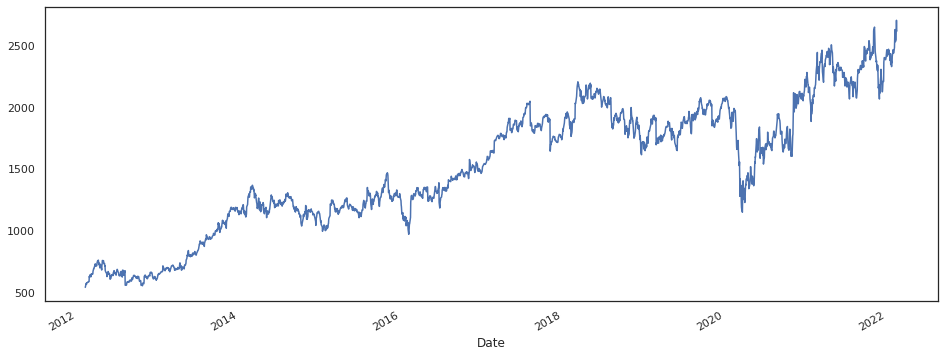

In [ ]:
train_set["Close"].plot(figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


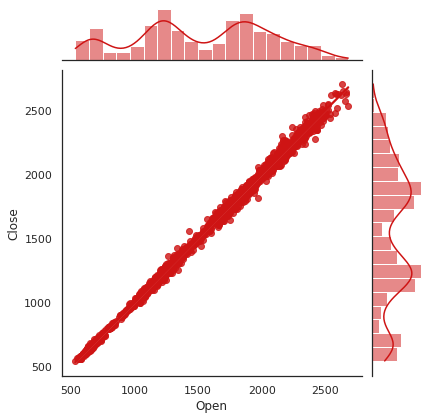

In [ ]:
import seaborn as sns


dataset = pd.concat((train_set,test_set), axis = 0)
sns.jointplot(dataset.loc[:,'Open'], dataset.loc[:,'Close'], kind="reg", color="#ce1414")

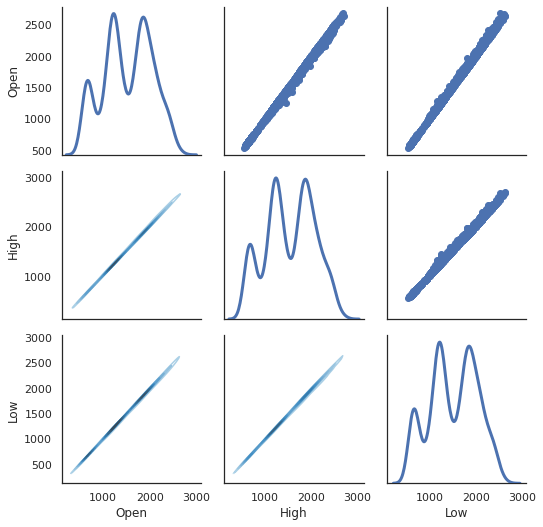

In [ ]:
sns.set(style="white")
df = dataset.loc[:,['Open','High','Low']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524 entries, 2012-02-10 to 2022-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2524 non-null   float64
 1   High       2524 non-null   float64
 2   Low        2524 non-null   float64
 3   Close      2524 non-null   float64
 4   Adj Close  2524 non-null   float64
 5   Volume     2524 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.0 KB


In [ ]:
train_set.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
train_set.shape

(2524, 6)

In [ ]:
train = train_set['Close']
train = pd.DataFrame(train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2524):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 
# Initializing RNN
model = Sequential()

# first LSTM layer and dropout
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# second LSTM layer and dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# third LSTM layer and dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# fourth LSTM layer and dropout
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1))

# compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

# fitting to the training set
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
77/77 [==============================] - 15s 96ms/step - loss: 0.0198
Epoch 2/100
77/77 [==============================] - 7s 95ms/step - loss: 0.0050
Epoch 3/100
77/77 [==============================] - 7s 97ms/step - loss: 0.0044
Epoch 4/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0041
Epoch 5/100
77/77 [==============================] - 7s 95ms/step - loss: 0.0040
Epoch 6/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0037
Epoch 7/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0034
Epoch 8/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0033
Epoch 9/100
77/77 [==============================] - 8s 101ms/step - loss: 0.0033
Epoch 10/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0030
Epoch 11/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0030
Epoch 12/100
77/77 [==============================] - 7s 97ms/step - loss: 0.0027
Epoch 13/100
77/77 [===

In [ ]:
stock_price = test_set.iloc[:, 4:5].values
print(stock_price)

[[2518.2199707 ]
 [2469.83007812]
 [2295.        ]
 [2281.45996094]
 [2172.25      ]
 [2072.        ]
 [2163.52001953]
 [2102.06005859]
 [1985.04003906]
 [1817.16003418]
 [1899.5300293 ]
 [2035.4699707 ]
 [2030.35998535]
 [2017.40002441]
 [1999.94995117]
 [2080.17993164]
 [2202.43994141]
 [2161.13989258]
 [2186.31005859]
 [2161.38989258]
 [2201.95996094]
 [2159.75      ]
 [2261.98999023]
 [2247.92993164]
 [2276.82006836]
 [2371.91992188]
 [2327.98999023]
 [2348.44995117]
 [2367.83007812]
 [2374.9699707 ]
 [2298.        ]
 [2222.13989258]
 [2213.19995117]
 [2167.41992188]
 [2169.20996094]
 [2181.37988281]
 [2260.11010742]
 [2227.29003906]
 [2199.31005859]
 [2239.37988281]
 [2251.80004883]
 [2239.32006836]
 [2213.87011719]
 [2246.04003906]]


In [ ]:
test = test_set['Close']
test = pd.DataFrame(test)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2022-02-22 to 2022-04-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   44 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes


In [ ]:
dataset_new = pd.concat((train_set['Close'], test_set['Close']), axis = 0)
inputs = dataset_new[len(dataset_new) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       44 non-null     float32
dtypes: float32(1)
memory usage: 304.0 bytes


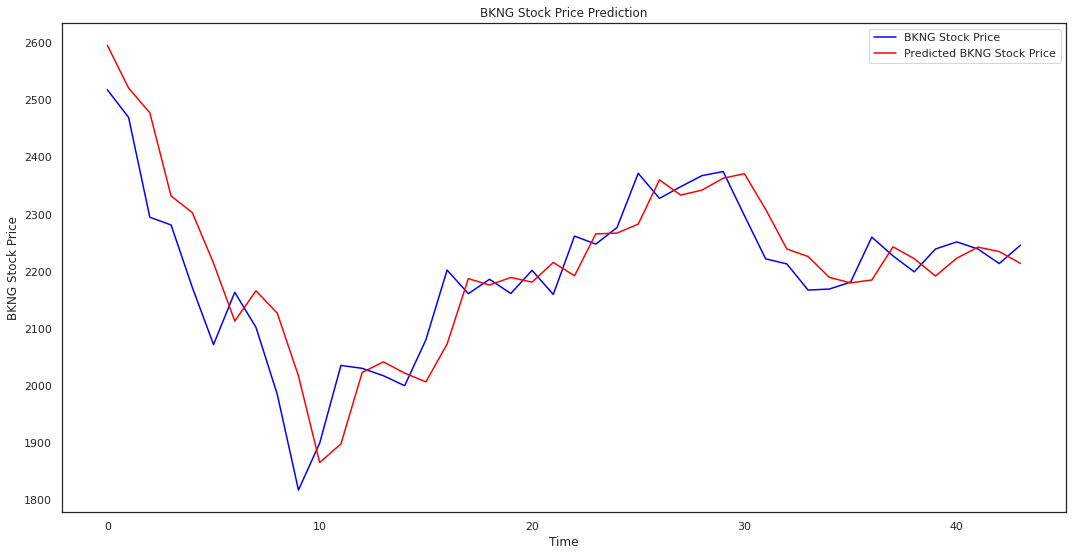

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(stock_price, color = 'blue', label = 'BKNG Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted BKNG Stock Price')
plt.title('BKNG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BKNG Stock Price')
plt.legend()
plt.show()

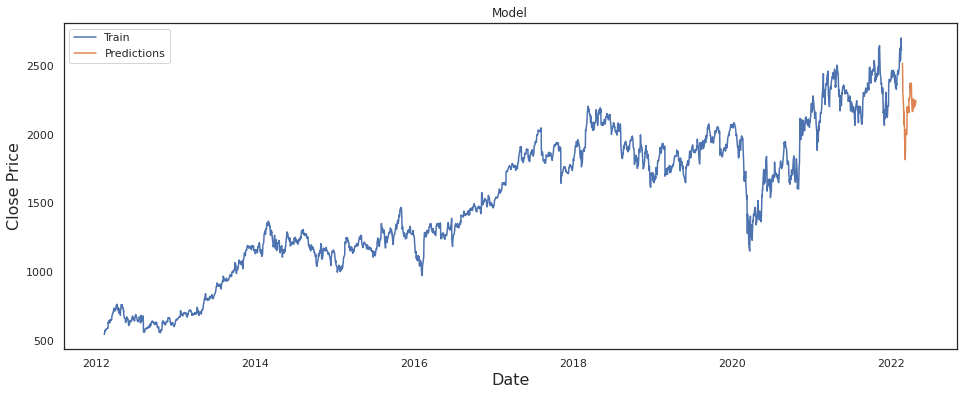

In [ ]:
test['Predictions'] = predicted_stock_price

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Predictions'], loc='upper left')
plt.show()